# Exploration of Ford GoBike system data (by Rodion Boriskin)



## Investigation Overview
Main purpose of investigation was discover following statistics:
 - how distribution of renting period, distance, user ages, genders, contract types look like
 - renting peaks and downs during the day and week
 - undertanding correlation of user types (subscriber or customer) also gender with renting durations and frequences
 - ratio between amount of rented and returned bikes at station (to understend if bike relocation process needed)


## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
Data was collected for Feb-2019 from 319 different renting statons.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load clean dataset (not to repeat cleaning process)
if 'fgb_df' not in globals():
    # if start without cleaning - load clean data set
    # import all packages and set plots to be embedded inline
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sb
    %matplotlib inline
        
    fgb_df = pd.read_csv('fordgobike_clean.csv', parse_dates=['start_time','end_time'])
    fgb_df.info()    
else:
    print('Data set "fgb_df" aready existed.')
    

# define function to add visualization info
def add_info(ttl, x_lbl, y_lbl, lgnd=[], x_tck=[], x_tcklbl=[], y_tck=[], y_tcklbl=[]):
    plt.title(ttl)
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    if lgnd:
        plt.legend(lgnd)
    else:
        plt.legend()

    if x_tck:
        plt.xticks(x_tck, x_tcklbl)
    
    if y_tck:
        plt.xticks(y_tck, y_tcklbl) 

# funtion to create values visualization for each pie element
def prcnt_value(val):
    pcnt_val = str(np.round(val,2))+'%'
    return pcnt_val

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183215 entries, 0 to 183214
Data columns (total 23 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null datetime64[ns]
end_time                   183215 non-null datetime64[ns]
start_station_id           183215 non-null int64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null int64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          183215 non-null int64
member_gender              183215 non-null object
bike_share_for_all_trip    183215 non-null bool
start_day_of_week          183215 non-null object
end_day_of_week           

## Visualization of period and distance distributions

#### * Both renting period and cycling distance distributions are skiwed to right
#### * Renting period is quete short 5-10 minutes. Some orders are up till 60 minutes.
#### * Cycling distance covers 500 - 2500 meters. There are few cases with long distance, similar to renting time.
#### * Also there is group of orders when bike was returned to the same station as it was rented (zero distance).
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
* Distance is calculated via geographical coordinates diffrence from start and ens stations

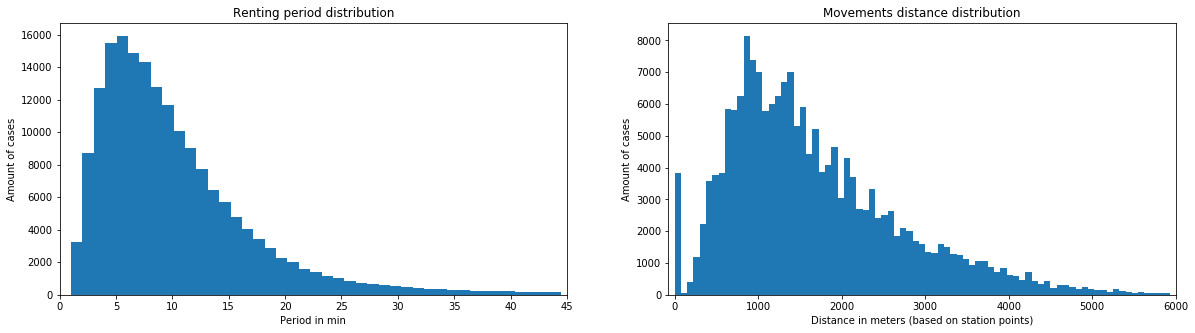

In [3]:
# renting period statistics
# figure size
plt.figure(figsize = [20, 5])

# define delta step and limits
dlt = 1.01
x_lim1 = fgb_df.rent_period_min.min()-dlt
x_lim2 = 45
bins = np.arange(x_lim1, x_lim2, dlt)

# first image
plt.subplot(1, 2, 1)

plt.hist(data=fgb_df, x='rent_period_min', bins = bins);
# add x axis limits to remove outliers
plt.xlim((x_lim1,x_lim2));

add_info('Renting period distribution', 'Period in min', 'Amount of cases')

# renting distance statistics
# define delta step and limits
dlt = 75.01
x_lim1 = fgb_df.direct_distance_m.min()-dlt
x_lim2 = 6000
bins = np.arange(x_lim1, x_lim2, dlt)

# second image
plt.subplot(1, 2, 2)

plt.hist(data=fgb_df, x='direct_distance_m', bins = bins);
# add x axis limits to remove outliers
plt.xlim((x_lim1,x_lim2));

add_info('Movements distance distribution', 'Distance in meters (based on station points)', 'Amount of cases')

## Visualization of user ages, genders, contract types

#### * Main user for this service are young  people in ages from 23 till 39. Howevwer there is no age limit in general
#### * Main users (71 %) are men. Wemen are only 22%. Reason to be clarified (ex. not convenient bike types, colors)
#### * 91% of user use "Subscriber" contranc for rentig (use on regular bases)
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

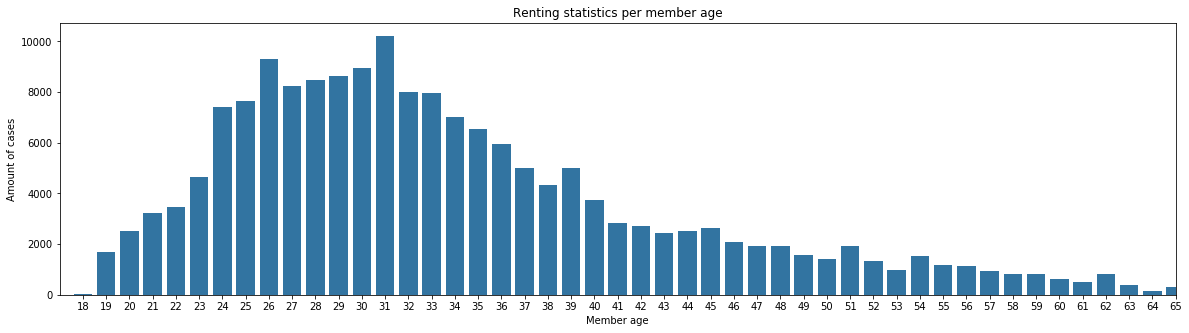

In [4]:
# renting distribution per age
#figure size
plt.figure(figsize = [20, 5])

#define delta step and limits
x_lim1 = -1
x_lim2 = 47

# single color
base_color = sb.color_palette()[0]
sb.countplot(data=fgb_df, x='member_age', color=base_color)
#add x axis limits to remove outliers
plt.xlim((x_lim1,x_lim2));

add_info('Renting statistics per member age', 'Member age', 'Amount of cases');

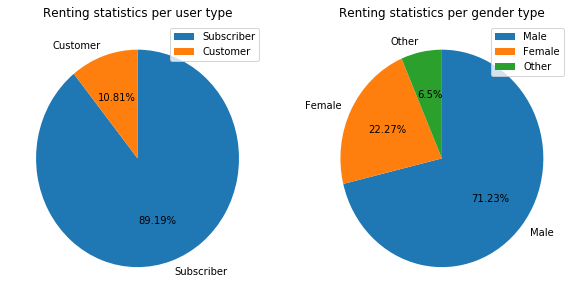

In [5]:
#figure size
plt.figure(figsize = [10, 5])

# second image
plt.subplot(1, 2, 1)

# renting distribution per user_type
user_counts = fgb_df.user_type.value_counts()
plt.pie(user_counts, labels = user_counts.index, startangle = 90, counterclock = False, autopct=prcnt_value);
add_info('Renting statistics per user type', '','');


# third image
plt.subplot(1, 2, 2)

# renting distribution per gender
#figure size
user_counts = fgb_df.member_gender.value_counts()
plt.pie(user_counts, labels = user_counts.index, startangle = 90, counterclock = False, autopct=prcnt_value);
add_info('Renting statistics per gender type', '','');

## Visualization of renting during weekdays and day hours

####  * During morning and evening peacks renting period is shorter (people are hurry to work) 
####  * During nights and mids of the day renting period is longer (looks people cycle slowly)
####  * In average during nights periods are more variable (people more "discover" or "walk" during cycling) <br><br>

#### * Based on avearge distance and period during working days it's possible to make following supposition:
####  at weekends people are cycling bikes more slowly and to another directions (for examples to shops, not to work)
#### * Distribution of period and distance during days and hours also support supposition above.
####   During working days mornings and evenings people use bikes to go to work (specific distance and time to cycle)
<br>
<br>
<br>
<br>

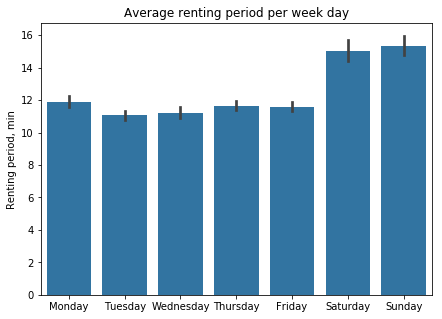

In [6]:
# violin plot for renting period and day of week
# normal day order
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#figure size
plt.figure(figsize = [7, 5])
# single color
base_color = sb.color_palette()[0]
sb.barplot(data=fgb_df, x='start_day_of_week', y='rent_period_min', color=base_color, order=day_order);

add_info('Average renting period per week day', '', 'Renting period, min');


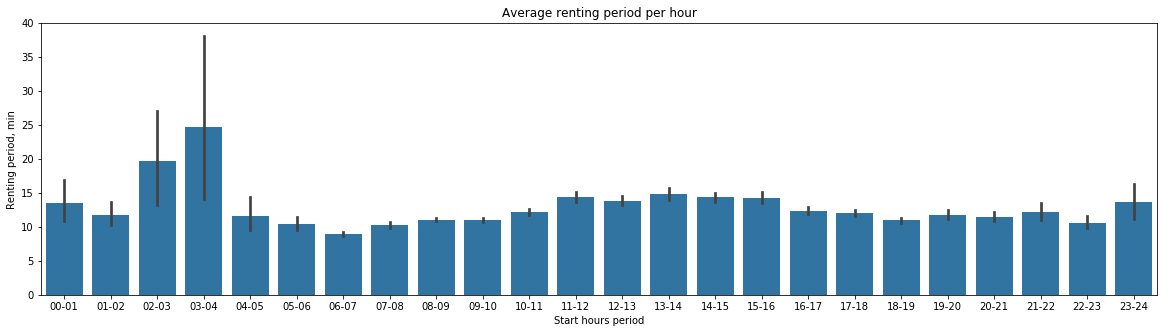

In [7]:
# normal hour order
hour_order = fgb_df.start_hour.value_counts()
hour_order.sort_index(inplace=True)
# figure size
plt.figure(figsize = [20, 5])
# single color
base_color = sb.color_palette()[0]
sb.barplot(data=fgb_df, x='start_hour', y='rent_period_min', color=base_color, order=hour_order.index);

add_info('Average renting period per hour', 'Start hours period', 'Renting period, min');

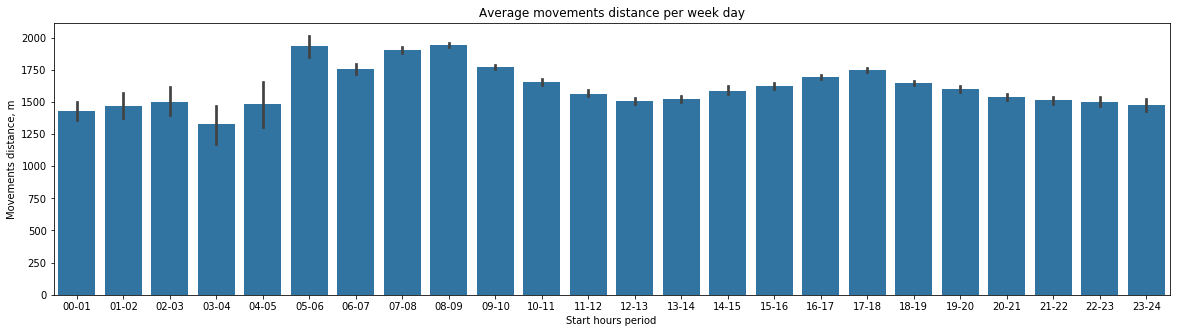

In [8]:
# normal hour order
hour_order = fgb_df.start_hour.value_counts()
hour_order.sort_index(inplace=True)
# figure size
plt.figure(figsize = [20, 5])
# single colo
base_color = sb.color_palette()[0]
sb.barplot(data=fgb_df, x='start_hour', y='direct_distance_m', color=base_color, order=hour_order.index);

add_info('Average movements distance per week day', 'Start hours period', 'Movements distance, m');

## Visualization of rent and return distribution
#### * At most of the stations amount of rentings and returns close to each other. 
#### * However at some station there is disbalance, therefore redistribution is needed. 
#### * List of stations shown below. Detailed reasons and frequency to be investigated separatelly.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

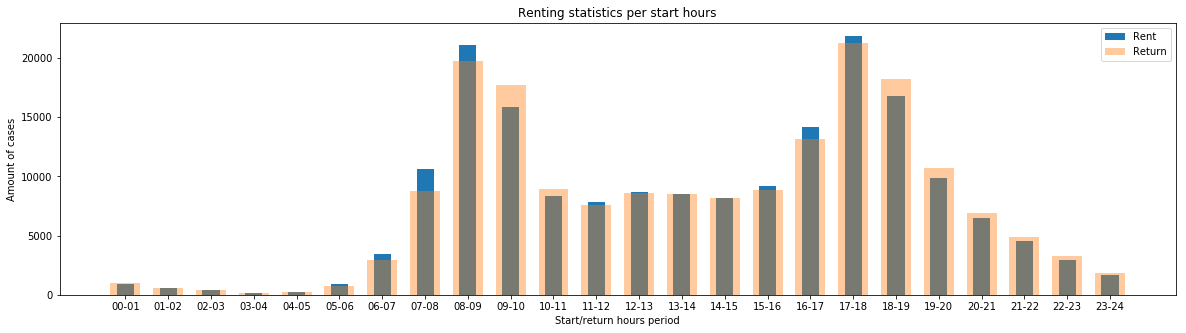

In [9]:
# renting distribution per week day
# figure size
plt.figure(figsize = [20, 5])
# normal hour order
hour_order = fgb_df.start_hour.value_counts()
hour_order.sort_index(inplace=True)
# single color for start_hour
base_color = sb.color_palette()[0]
plt.bar(hour_order.index, hour_order.values, color=base_color, width = 0.4);

hour_order = fgb_df.end_hour.value_counts()
hour_order.sort_index(inplace=True)
# single color for end_hour
base_color = sb.color_palette()[1]
plt.bar(hour_order.index, hour_order.values, color=base_color, width = 0.7, alpha = 0.4);

add_info('Renting statistics per start hours', 'Start/return hours period', 'Amount of cases', ['Rent', 'Return']);

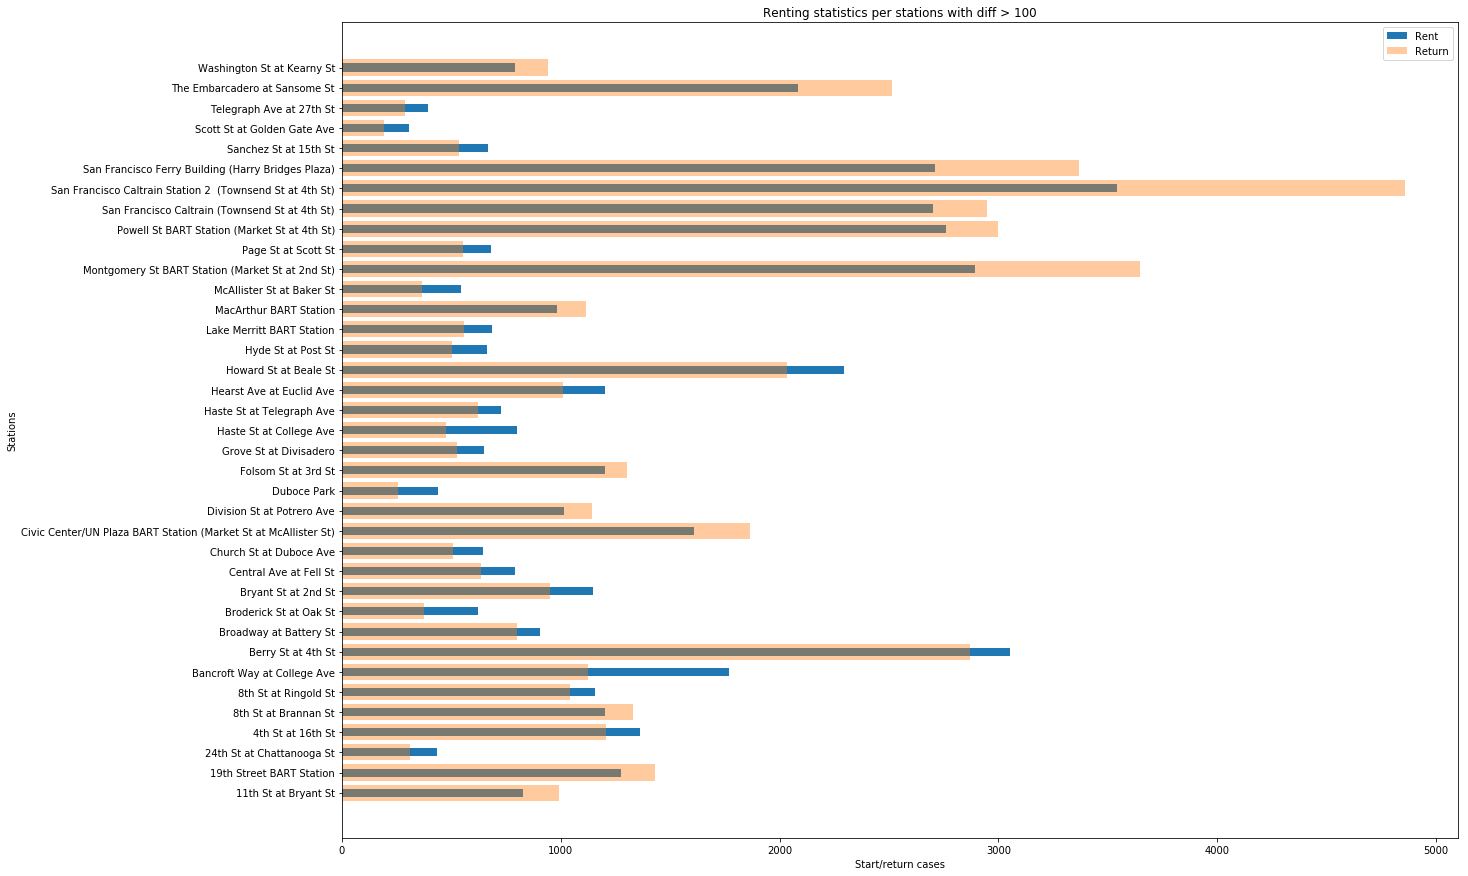

In [10]:
# load prepared before rent/return statistics
rent_return_df = pd.read_csv('rnt_rtrn_fordgobike_clean.csv')
# select stations with difference more than 50
dif_max = 100
redistr_stations = rent_return_df.query('difference < -@dif_max or difference > @dif_max')

# renting distribution per week day
# figure size
plt.figure(figsize = [20, 15])
# single color for stations
base_color = sb.color_palette()[0]
plt.barh(redistr_stations.station_name, redistr_stations.rented, color=base_color, height=0.4) 
#plt.xticks(rotation=45);

# single color for stations
base_color = sb.color_palette()[1]
plt.barh(redistr_stations.station_name, redistr_stations.returned, color=base_color, height=0.8, alpha=0.4)

add_info('Renting statistics per stations with diff > 100', 'Start/return cases', 'Stations', ['Rent', 'Return']);

## Conclusion and recommendation
#### Idea 1: 
As soom total level of orders lower and ratio of  customer orders higher during weekends to introduse discounts for customer orders during weekends to compensate renting level drop during weekends.<br>
#### Idea 2: 
As soon as level of Female orders many less than Male it needs to investigate reasons (may be byke types) to improve further total Female ratio.
#### Idea 3: 
As soon as bike lacking issue (difference between rented and returned bikes) available for specific stations (37 with more then 100 bikes per month) proposed solution: to organize periodical redistribution or set some discounts for returning bikes to problematic stations.
<br>
<br>
<br>
<br>
<br>
<br>

## Thanks for yuor attention!
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [11]:
# Use this command if you are running this file in local
#!jupyter nbconvert Part_II_slide_deck_fordbike_renting.ipynb --to slides --post serve --no-input --no-prompt
!jupyter nbconvert Part_II_slide_deck_fordbike_renting.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_fordbike_renting.ipynb to slides
[NbConvertApp] Writing 512379 bytes to Part_II_slide_deck_fordbike_renting.slides.html


### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
